In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm

# Tomi data

In [10]:
data = pd.read_csv('Tomi_core_tweets.csv')
data

,Is_retweet,Is_quote,Is_reply,Retweets,Favorites,Created,Time_since_last,Streak of 0:30:00,Streak of 6:00:00,Per 1:00:00,"Per 1 day, 0:00:00",Predicted_polarity,User
0,False,False,False,113,602,2021-05-28 03:27:25,0 days 00:48:20,1,8,1,8,0.255926,468646961
1,False,False,False,284,2488,2021-05-28 02:39:05,0 days 01:38:23,1,8,1,8,-0.008599,468646961
2,False,False,False,753,5081,2021-05-28 01:00:42,0 days 00:51:58,1,8,1,8,-0.872967,468646961
3,False,False,False,89,495,2021-05-28 00:08:44,0 days 00:32:24,1,8,1,8,0.206923,468646961
4,False,False,False,305,2764,2021-05-27 23:36:20,0 days 03:10:27,1,8,1,8,0.103586,468646961
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20765,False,False,False,0,0,2014-07-19 06:48:49,20 days 10:03:57,1,1,1,1,-0.026356,30721022
20766,False,False,False,0,0,2014-06-28 20:44:52,7 days 18:16:34,1,1,1,1,-0.026356,30721022
20767,False,False,False,0,0,2014-06-21 02:28:18,2 days 12:40:46,1,1,1,1,-0.351205,30721022
20768,True,False,False,2,0,2014-06-18 13:47:32,3 days 11:13:52,1,1,1,1,0.915710,30721022


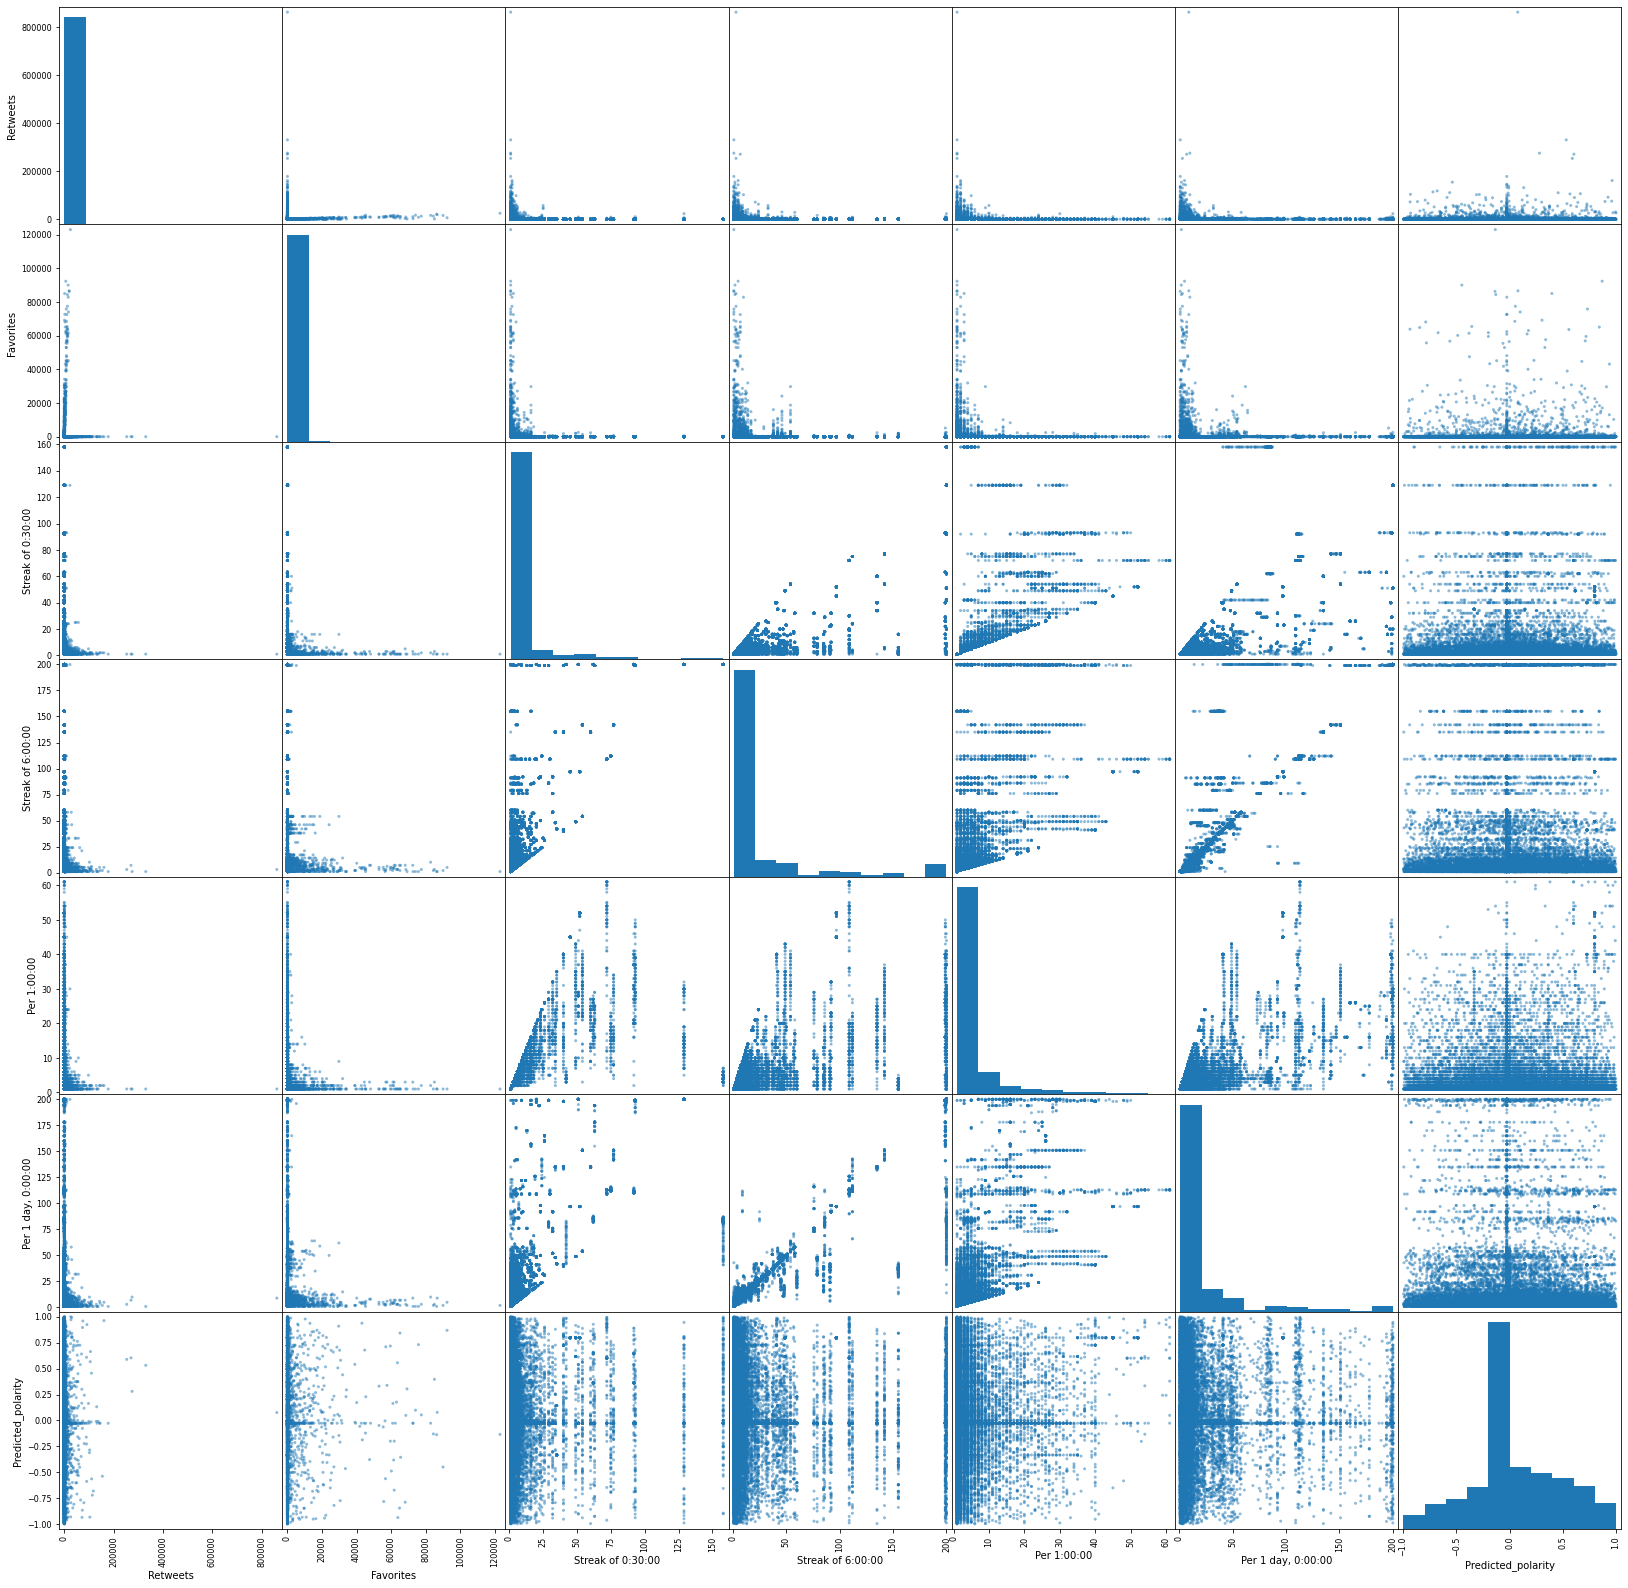

In [11]:
pd.plotting.scatter_matrix(data[['Retweets','Favorites','Created','Time_since_last','Streak of 0:30:00','Streak of 6:00:00','Per 1:00:00','Per 1 day, 0:00:00','Predicted_polarity']], figsize = (28,28))
plt.show()

In [12]:
data['thing_squared'] = data['Per 1:00:00']**2
fit = sm.OLS(np.array(data.Predicted_polarity), sm.add_constant(np.array(data[['Per 1:00:00', 'thing_squared']]))).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     218.8
Date:                Fri, 28 May 2021   Prob (F-statistic):           9.46e-95
Time:                        11:05:39   Log-Likelihood:                -10758.
No. Observations:               20770   AIC:                         2.152e+04
Df Residuals:                   20767   BIC:                         2.155e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0968      0.004     24.059      0.000       0.089       0.105
x1            -0.0146      0.001    -15.347      0.000      -0.016      -0.013
x2             0.0005   2.44e-05     19.644      0.000       0.000       0.001
==============================================================================
Omnibus:                        1.159   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.560   Jarque-Bera (JB):                1.178
Skew:                          -0.010   Prob(JB):                        0.555
Kurtosis:                       2.969   Cond. No.                         450.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

array([[<AxesSubplot:xlabel='Spread', ylabel='Spread'>,
        <AxesSubplot:xlabel='User', ylabel='Spread'>],
       [<AxesSubplot:xlabel='Spread', ylabel='User'>,
        <AxesSubplot:xlabel='User', ylabel='User'>]], dtype=object)

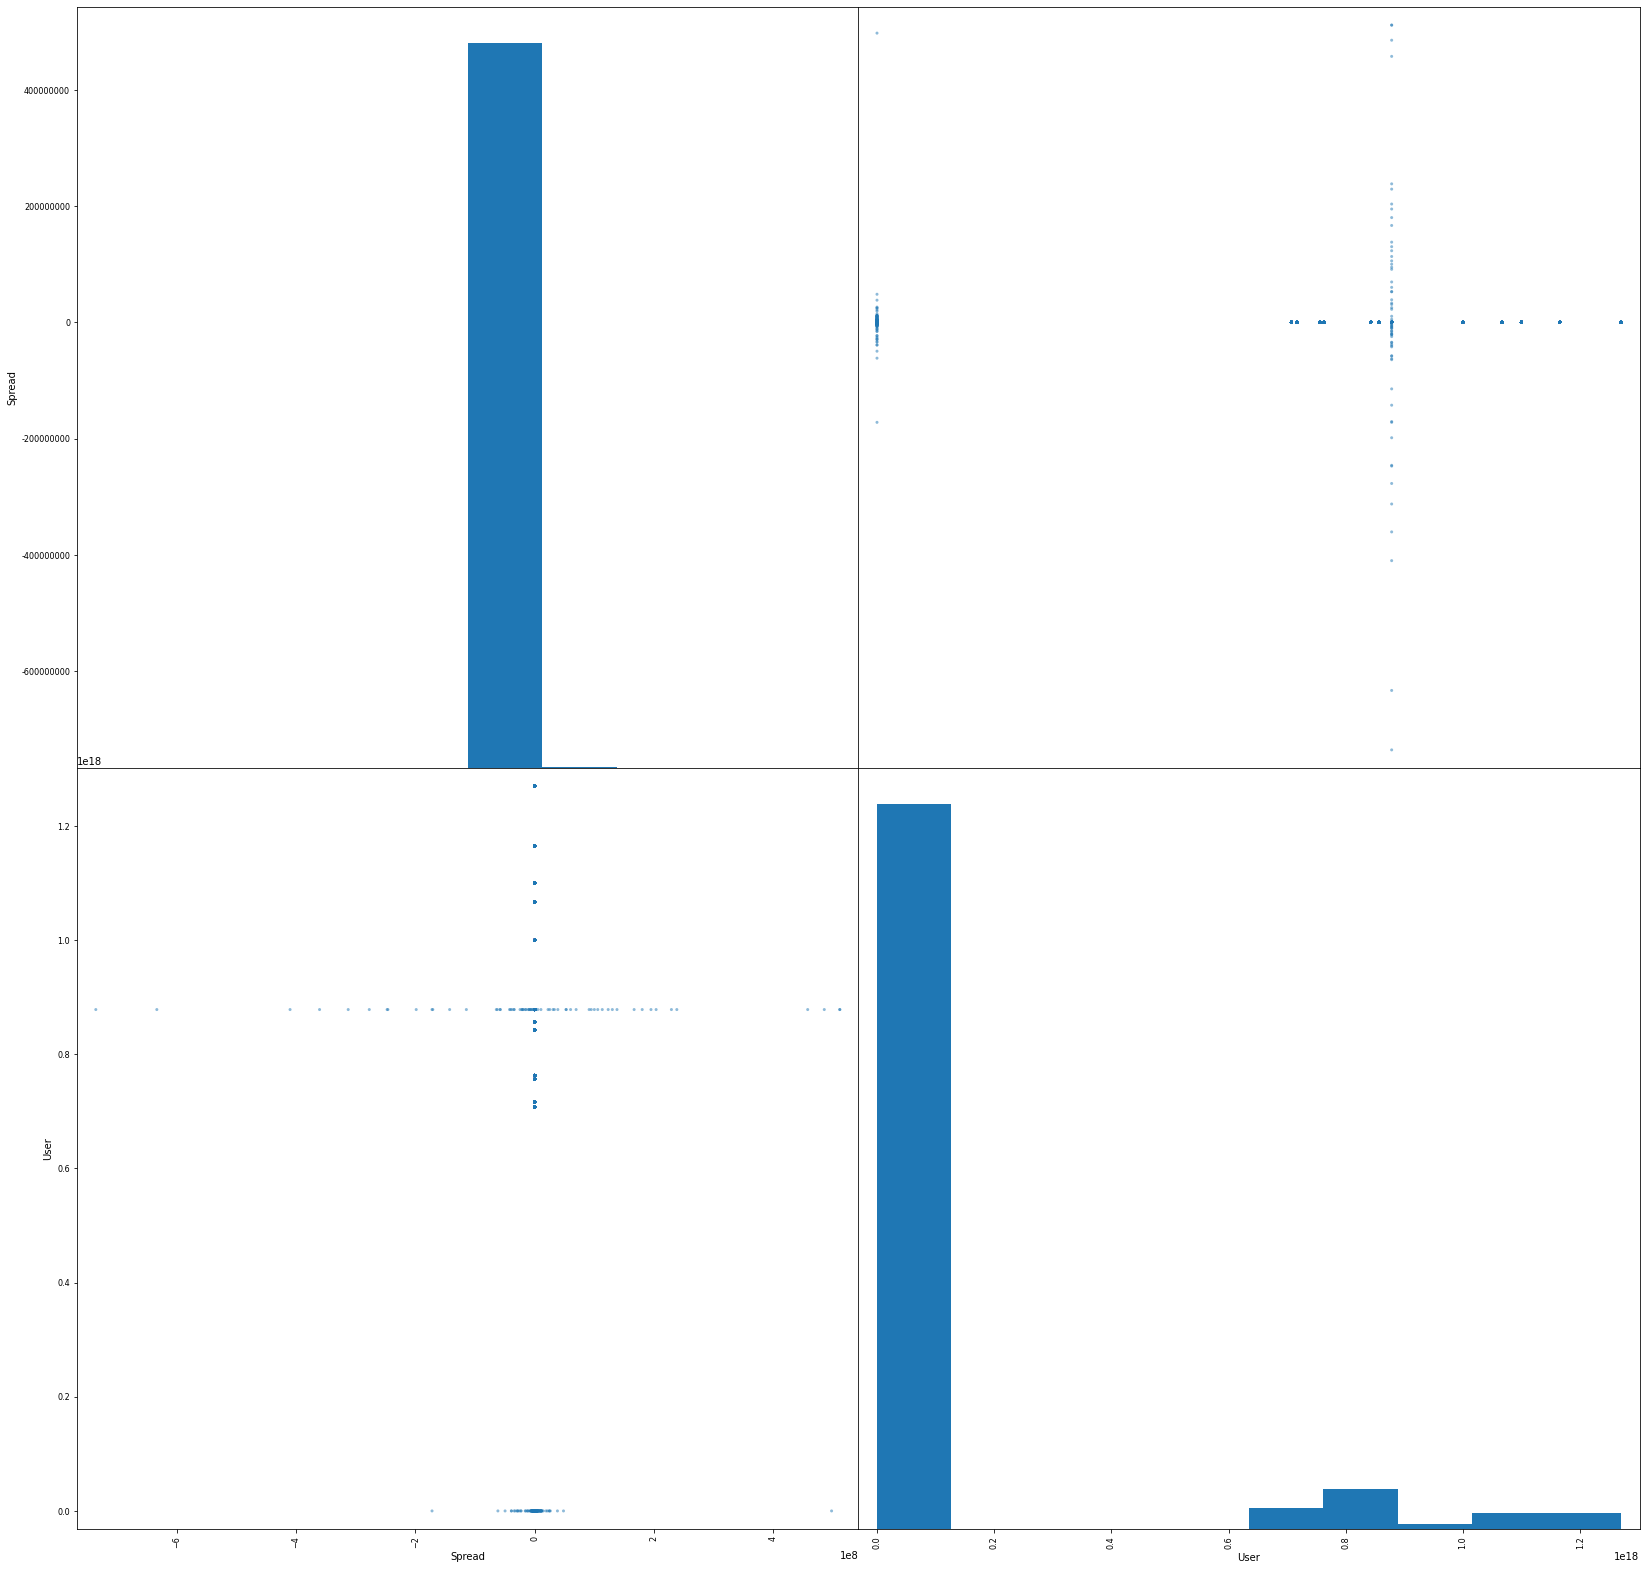

In [15]:
data['Spread'] = (data['Retweets']+1)*(data['Favorites']+1)*data['Predicted_polarity']*(1-data['Is_retweet'])*(1-data['Is_quote'])*(1-data['Is_reply'])
pd.plotting.scatter_matrix(data[['Spread','User']], figsize = (28,28))

<ufunc 'positive'>

# Erdos data

In [3]:
data = pd.read_csv('Erdos_core_tweets.csv')
data

,Is_retweet,Is_quote,Is_reply,Retweets,Favorites,Created,Time_since_last,Streak of 0:30:00,Streak of 6:00:00,Per 1:00:00,"Per 1 day, 0:00:00",Predicted_polarity,User
0,True,False,False,1,0,2021-05-20 02:52:07,2 days 12:09:26,1,1,1,1,-0.026356,840727059001417728
1,False,True,False,0,1,2021-05-17 14:42:41,0 days 00:00:38,2,2,2,2,-0.023730,840727059001417728
2,False,False,True,0,1,2021-05-17 14:42:03,10 days 14:15:05,2,2,2,2,0.911806,840727059001417728
3,False,True,False,0,4,2021-05-07 00:26:58,0 days 00:09:20,2,2,2,2,-0.026356,840727059001417728
4,False,False,True,1,6,2021-05-07 00:17:38,6 days 12:42:47,2,2,2,2,-0.026356,840727059001417728
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18651,False,False,True,0,0,2020-10-03 15:57:07,0 days 00:00:14,2,2,2,2,0.010908,556041652
18652,False,False,False,1,3,2020-10-03 15:56:53,0 days 18:09:22,2,2,2,2,0.725753,556041652
18653,False,False,True,0,2,2020-10-02 21:47:31,0 days 03:59:29,1,3,1,3,0.188250,556041652
18654,False,False,True,0,2,2020-10-02 17:48:02,0 days 01:09:22,1,3,1,3,0.212042,556041652


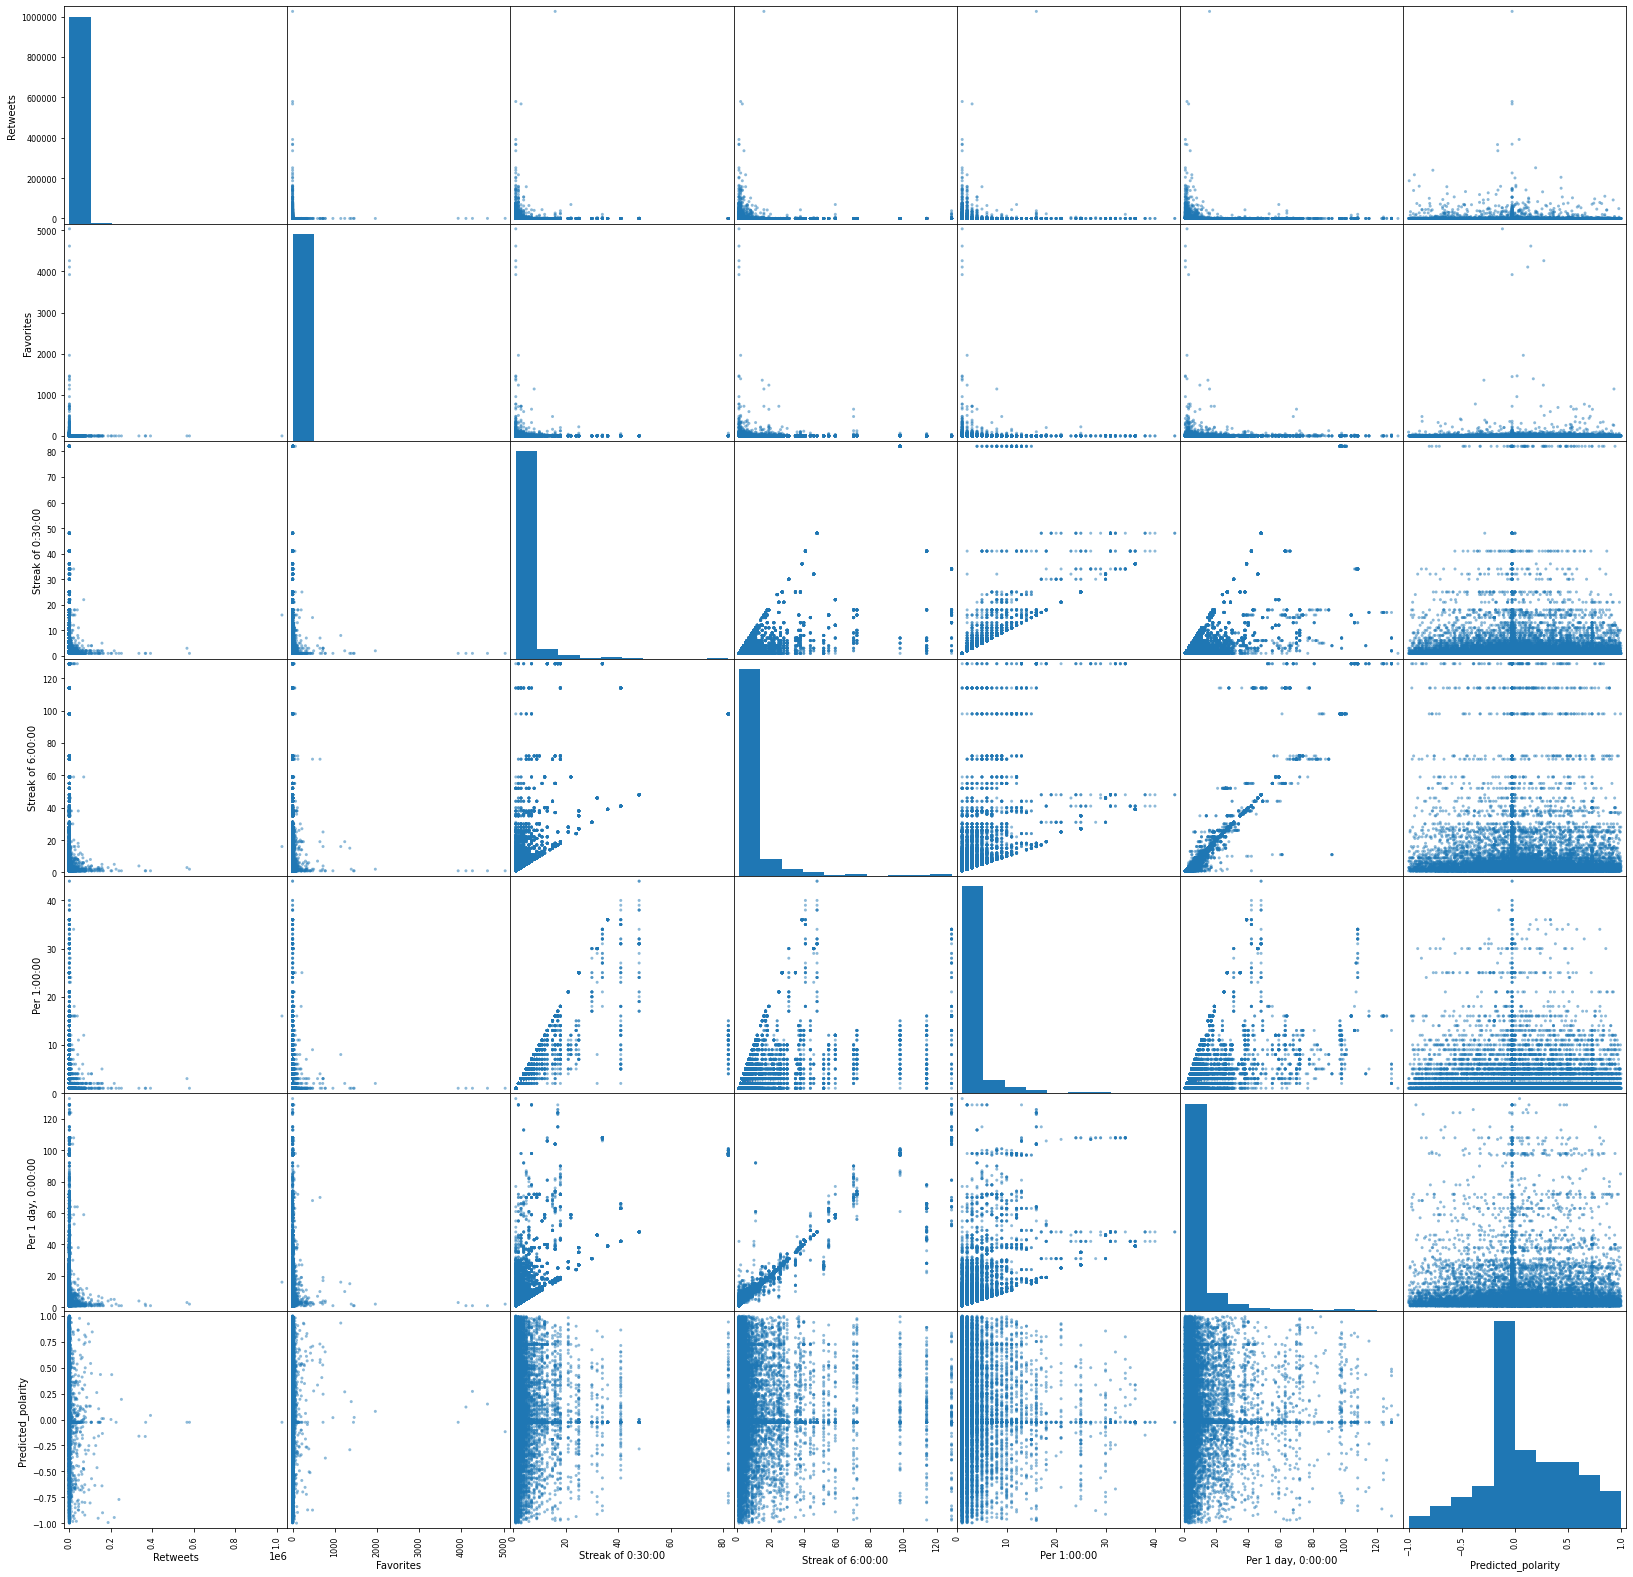

In [7]:
pd.plotting.scatter_matrix(data[['Retweets','Favorites','Created','Time_since_last','Streak of 0:30:00','Streak of 6:00:00','Per 1:00:00','Per 1 day, 0:00:00','Predicted_polarity']], figsize = (28,28))
plt.show()

In [9]:
data['thing_squared'] = data['Per 1:00:00']**2
fit = sm.OLS(np.array(data.Predicted_polarity), sm.add_constant(np.array(data[['Per 1:00:00']]))).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     41.10
Date:                Fri, 28 May 2021   Prob (F-statistic):           1.48e-10
Time:                        10:55:23   Log-Likelihood:                -9990.0
No. Observations:               18656   AIC:                         1.998e+04
Df Residuals:                   18654   BIC:                         2.000e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1178      0.004     32.170      0.000       0.111       0.125
x1            -0.0045      0.001     -6.411      0.000      -0.006      -0.003
==============================================================================
Omnibus:                       29.261   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.572
Skew:                          -0.013   Prob(JB):                     4.62e-06
Kurtosis:                       2.824   Cond. No.                         6.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
pd.Timestamp(data.Created[0])

Timestamp('2021-05-28 03:27:25')

In [29]:
 pd.Timestamp(data.Created[1])

Timestamp('2021-05-28 02:39:05')